LABORATORIO PARTE 1 NUMPY

1. Cual es el tamaño en bytes de un array de 1000 elementos tipo booleano

In [7]:
import numpy as np

arreglo = np.array([True]*1000, dtype=bool)
totalbytes = arr.nbytes
print(f"El tamaño en bytes es: {totalbytes}")


El tamaño en bytes es: 1000


2. Cree un array cuyos elementos sean los enteros pares en [1,1000], y en orden decreciente. Muestre los 10 ultimos por pantalla

In [17]:
arreglopares = np.arange(1000, 1, -2)

print("Los últimos 10 elementos son:")
print(arreglopares[-10:])


Los últimos 10 elementos son:
[20 18 16 14 12 10  8  6  4  2]


3. Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5


In [38]:
arreglo3 = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
sub_arr_1 = arreglo3[1, 0:4]
print("El subarray de elementos [0, 3, 7, 4] es:")
print(sub_arr_1)

sub_arr_2 = arreglo3[[0,2], 0:3]
print("El subarray de elementos [2, 5] y [8, 5] es:")
print(sub_arr_2)


El subarray de elementos [0, 3, 7, 4] es:
[0 3 7 4]
El subarray de elementos [2, 5] y [8, 5] es:
[[2 4 5]
 [8 8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
obtenga la media aritmética de la diferencia (a-b).

In [37]:
a = [1, 4, 2, 7]
b = [1, 3, 2, 9]
diferencia = np.subtract(a, b)
media = np.mean(diferencia)
print(media)

-0.25


5. Tengo valores de cordenadas (x, y) en las columnas
del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [41]:
arreglo4 = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])
new_coords = np.array([37.1, -3.6])
arreglo4 = np.vstack([arreglo4, new_coords])

print("Dimensiones del nuevo array:", arreglo4.shape)


Dimensiones del nuevo array: (4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo.
Agregue ahora dos nuevos pares de coordenadas: (10.8,
3.0) y (35.8, 12.0).

In [45]:
arreglo5 = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])
transp = arr.T
nuevos = np.array([[10.8, 3.0],
                       [35.8, 12.0]])
transp = np.hstack([transp, nuevos])
arreglo5 = transp.T
print(arreglo5)


[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [10.8  35.8 ]
 [ 3.   12.  ]
 [10.8  35.8 ]
 [ 3.   12.  ]]


PARTE 2: EXPLORACION Y MINERIA DE DATOS

In [48]:
import pandas as pd

In [91]:
data=pd.read_csv("NucleosPoblacion.csv")

1. ¿Cuántos Municipios tienen más de 100000
habitantes?.

In [92]:
data.columns

Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y'],
      dtype='object')

In [93]:
municipiosm = data[data["Poblacion"] > 100000]
num_municipios = len(municipiosm)
print(f"El número de municipios con población mayor a 1000 es {num_municipios}.")


El número de municipios con población mayor a 1000 es 62.


2. Realice una gráfica de barras sobre la polbación de cada
ciudad, ordenela de menor a mayo y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de
las ciudades más pobladas?

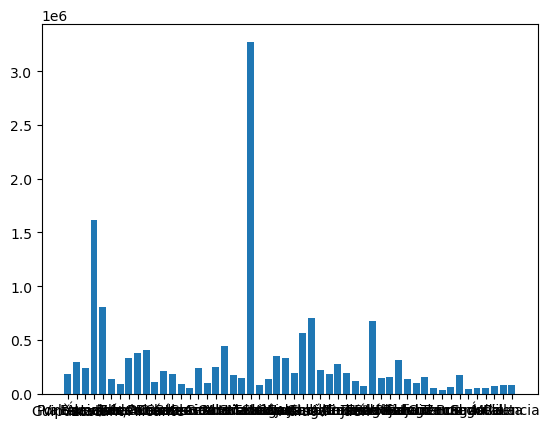

La segunda provincia más poblada es Barcelona.
La provincia de Granada ocupa la posición 18 en el ranking de provincias más pobladas.


In [94]:
import matplotlib.pyplot as plt
data = data.sort_values(by="Poblacion")
plt.bar(data["Provincia"], data["Poblacion"])
plt.show()
data = data.sort_values(by="Poblacion", ascending=False)
print(f"La segunda provincia más poblada es {data.iloc[1]['Provincia']}.")
granada = data[data["Provincia"] == "Granada"]
posicion_granada = data.index.get_loc(granada.index[0])

print(f"La provincia de Granada ocupa la posición {posicion_granada+1} en el ranking de provincias más pobladas.")


3. Cuántos municipios de Extremadura tienen más de 5000
habitantes?.

In [95]:
municipios = data[data['Poblacion'] > 5000]
num_municipios = municipios['Municipio'].nunique()
print(f"Hay {num_municipios} municipios en la provincia de Extremadura con una población mayor a 5000.")


Hay 751 municipios en la provincia de Extremadura con una población mayor a 5000.


4. ¿Cuál es el municipio situado más al Norte? (Usar el
valor de la coordenada "Y" que representa la latitud en
grados). Proporcione también la provincia a la que
pertenece y su población.

In [104]:
dataordenada = data.sort_values(by='Y', ascending=False)
municipionorte = dataordenada.iloc[0]['Municipio']
provincianorte = dataordenada.iloc[0]['Provincia']
poblacionnorte = dataordenada.iloc[0]['Poblacion']
print(f"El municipio más al norte es: {municipionorte}")
print(f"Pertenece a la provincia: {provincianorte}") 
print(f"Con poblacion: {poblacionnorte}") 


El municipio más al norte es: Viveiro
Pertenece a la provincia: Lugo
Con poblacion: 16211.0


5. Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada.

In [105]:
data_granada = data[data['Provincia'] == 'Granada']
media_poblacion = data_granada['Poblacion'].mean()
mediana_poblacion = data_granada['Poblacion'].median()
desviacion_estandar = data_granada['Poblacion'].std()
valor_maximo_poblacion = data_granada['Poblacion'].max()
valor_minimo_poblacion = data_granada['Poblacion'].min()

# Imprimir el resultado
print(f"Media: {media_poblacion:.2f}")
print(f"Mediana: {mediana_poblacion:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Valor máximo: {valor_maximo_poblacion}")
print(f"Valor mínimo: {valor_minimo_poblacion}")


Media: 30217.85
Mediana: 17526.00
Desviación estándar: 50355.49
Valor máximo: 239154.0
Valor mínimo: 10386.0


6. Realice un histograma con la población de los
Municipios para cada una de las provincias.

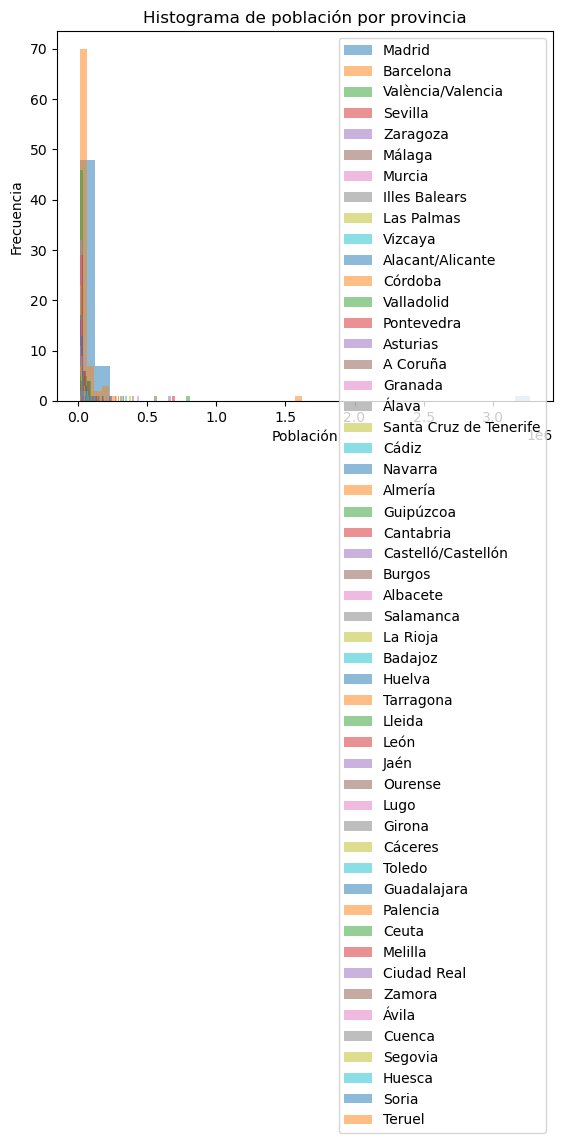

In [110]:
provincias = data['Provincia'].unique()
for provincia in provincias:
    df_provincia = data[data['Provincia'] == provincia]
    plt.hist(df_provincia['Poblacion'], bins=30, alpha=0.5, label=provincia)
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población por provincia')
plt.legend(loc='upper right')
plt.show()


7. Seleccione al azar cincuenta municipios diferentes de
entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y
la desviación estándar de esto 50 municipios?.

In [111]:
munazar = data.sample(n=50, replace=False)
promedio = np.mean(munazar['Poblacion'])
desviacion = np.std(munazar['Poblacion'])

# Imprimir los resultados
print("Promedio de población de los 50 municipios al azar:", promedio)
print("Desviación estándar de los 50 municipios al azar:", desviacion)


Promedio de población de los 50 municipios al azar: 28540.8
Desviación estándar de los 50 municipios al azar: 28321.564422891606
